In [1]:
import pandas as pd
from tqdm import tqdm 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [2]:
#this file will have all of the potential out paths we want 
df = pd.read_json("/shared/3/projects/benlitterer/podcastData/processed/floydMonth/floydMonthData.jsonl", orient="records", lines=True)

In [404]:
fileSample = list(df.sample(10000)["potentialOutPath"])

In [405]:
dfList = []
for i, path in tqdm(enumerate(fileSample)): 
    #feature = "F1frequency_sma3nz"
    feature = 'F0semitoneFrom27.5Hz_sma3nz'
    currDf = pd.read_csv(path).dropna(subset=[feature])
    currDf = currDf[currDf[feature] > 0]
    currDf["transcriptNum"] = i
    currDf["potentialOutPath"] = path
    #sns.kdeplot(data=currDf, x=feature, color="blue", alpha=.1)
    dfList.append(currDf[["potentialOutPath", feature,"transcriptNum"]])

10000it [14:54, 11.18it/s]


In [410]:
prosDf = pd.concat(dfList, axis=0)

In [ ]:
#prosDf = prosDf[prosDf["transcriptNum"] != 1516]

In [411]:
merged = pd.merge(df[["potentialOutPath", "category1"]], prosDf, on="potentialOutPath", how="inner")

In [437]:
#find the means 
mergedGroup = merged[[feature, "category1"]].groupby("category1").agg([np.median, len]) #.sort_values(feature)


In [438]:
mergedGroup = mergedGroup.droplevel(0, axis=1)

In [439]:
mergedGroup = mergedGroup[mergedGroup["len"] > 10000]

In [441]:
mergedGroup = mergedGroup.sort_values("median")

In [444]:
mergedGroup.head() 

,median,len
category1,,
games,17.238332,73075
music,17.511039,972922
technology,18.702571,763118
science,19.023619,427015
fiction,19.137655,344783


In [445]:
mergedGroup.tail()

,median,len
category1,,
business,20.617896,5595333
health,20.911395,2771227
education,21.280225,4116235
true crime,21.386611,166598
kids,21.478250,627456


In [403]:
bugPath = mergedSamp[mergedSamp["transcriptNum"] == 1516].iloc[0]["potentialOutPath"]
#list(df.loc[df["potentialOutPath"] == bugPath, feature])[0]
list(mergedSamp.loc[mergedSamp["transcriptNum"] == 1516, feature])

list(df.loc[df["potentialOutPath"] == bugPath, "enclosure"])[0]

'https://anchor.fm/s/11d9ad80/podcast/play/14202377/https%3A%2F%2Fd3ctxlq1ktw2nl.cloudfront.net%2Fstaging%2F2020-05-24%2Fd961524c6bf7162bb0c8e75dcf8adeee.m4a'

(array([2.470e+02, 2.710e+02, 4.220e+02, 8.158e+03, 6.500e+02, 8.980e+02,
        9.890e+02, 1.820e+02, 3.300e+01, 2.000e+00]),
 array([ 0.49084081,  6.20346725, 11.9160937 , 17.62872014, 23.34134659,
        29.05397303, 34.76659947, 40.47922592, 46.19185236, 51.90447881,
        57.61710525]),
 <BarContainer object of 10 artists>)

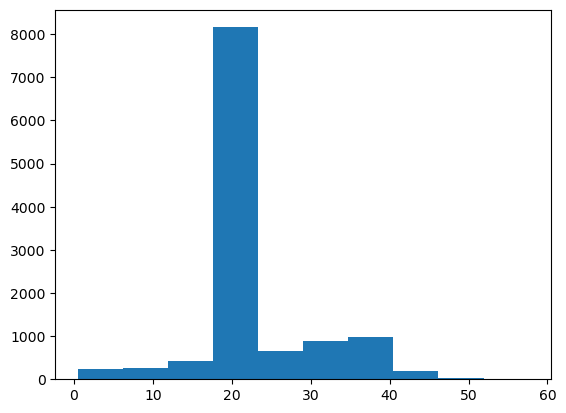

In [396]:
plt.hist(mergedSamp.loc[mergedSamp["transcriptNum"] == 1516, feature])

In [395]:
mergedSamp[(mergedSamp[feature] > 19) & (mergedSamp[feature] < 20)]["transcriptNum"].value_counts()

transcriptNum
1516    7708
1346     594
251      482
350      448
956      411
1272     369
1993     299
953      295
782      293
587      288
1713     284
1865     263
95       255
1501     254
1503     203
65       196
1777     191
1931     190
1810     165
80       165
176      161
1663     154
68       150
357      129
1033     100
1850      90
1264      87
63        86
1220      28
1086      23
1329      12
1888       8
160        5
Name: count, dtype: int64

Text(0.5, 0, 'Pitch (Semitones over 27.5 Hz)')

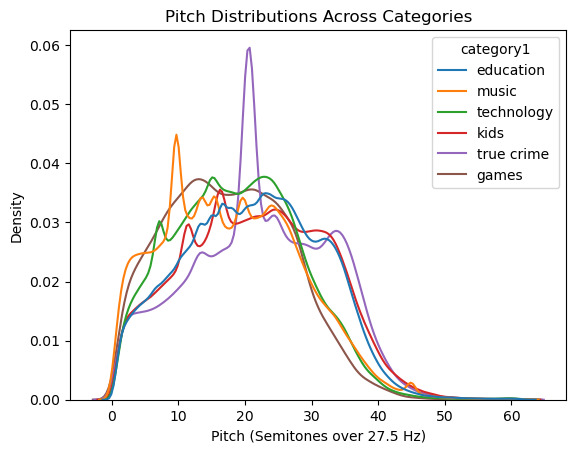

In [446]:
keepList = ["true crime", "kids", "education", "games", "music", "technology"]
mergedSamp = merged[merged["category1"].apply(lambda x: x in keepList)]
sns.kdeplot(mergedSamp, x=feature, hue="category1", common_norm=False)
plt.title("Pitch Distributions Across Categories")
plt.xlabel("Pitch (Semitones over 27.5 Hz)")

In [423]:
mergedSamp["category1"].value_counts()

category1
religion         7285111
business         5595333
society          5240026
sports           4648630
education        4116235
news             3117014
comedy           2842126
health           2771227
arts             2241751
leisure          1730543
tv               1621818
music             972922
technology        763118
kids              627456
science           427015
history           356628
fiction           344783
government        229271
true crime        166598
games              73075
entertainment       2149
spirituality        1358
commentary           285
Name: count, dtype: int64

(0.0, 0.1)

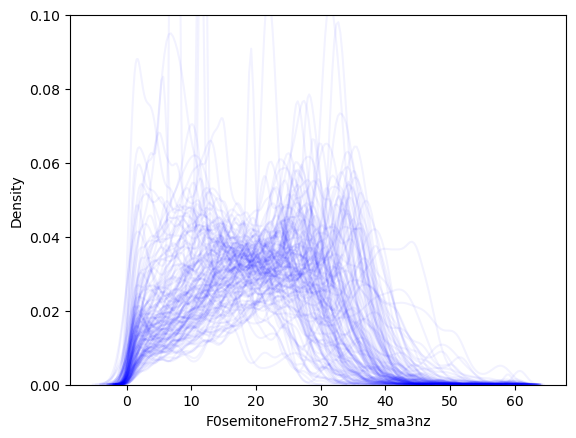

In [73]:
palette = sns.color_palette(['blue'], len(prosDf["transcriptNum"].unique()))
sns.kdeplot(data=prosDf, x=feature, hue="transcriptNum", color="blue", palette = palette, alpha=.05, legend=False, common_norm=False, bw_adjust=.4)
plt.ylim(0, .1)

In [158]:
len(fileSample)

1000

In [202]:
#ok now for each conversation, slice it into a bunch of peices 
convShapeList = []
stackedMeans = []
pathList = []
for i, path in tqdm(enumerate(fileSample)): 
    feature = 'F0semitoneFrom27.5Hz_sma3nz'
    currDf = pd.read_csv(path).dropna(subset=[feature])
    currDf = currDf[currDf[feature] > 0]

    if len(currDf) > 1000: 
        splits = np.array_split(currDf[feature], 20)
        means = [np.nanmean(split) for split in splits] 
        convShapeList.append(pd.DataFrame({"means":means, "potentialOutPath":path, "bin":list(range(1,21))}))
        stackedMeans.append(means)
        pathList.append(path)

0it [00:00, ?it/s]/opt/anaconda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/opt/anaconda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
3it [00:00, 26.01it/s]/opt/anaconda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/opt/anaconda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
6it [00:00, 17.08it/s]/opt/anaconda/lib/

In [326]:
convShapeDf = pd.concat(convShapeList, axis=0)
convShapeDf.head() 

,means,potentialOutPath,bin
0,24.169662,/shared/3/projects/benlitterer/podcastData/pro...,1
1,26.395568,/shared/3/projects/benlitterer/podcastData/pro...,2
2,28.256392,/shared/3/projects/benlitterer/podcastData/pro...,3
3,28.764855,/shared/3/projects/benlitterer/podcastData/pro...,4
4,29.237594,/shared/3/projects/benlitterer/podcastData/pro...,5


In [327]:
convShapeDf = pd.merge(convShapeDf, df[["potentialOutPath", "wCount", "transcript", "popularityScore", "category1", "category2", "category3", "cleanDatesLoc", "enclosure"]], on="potentialOutPath", how="inner") 

Text(0, 0.5, 'binned F0')

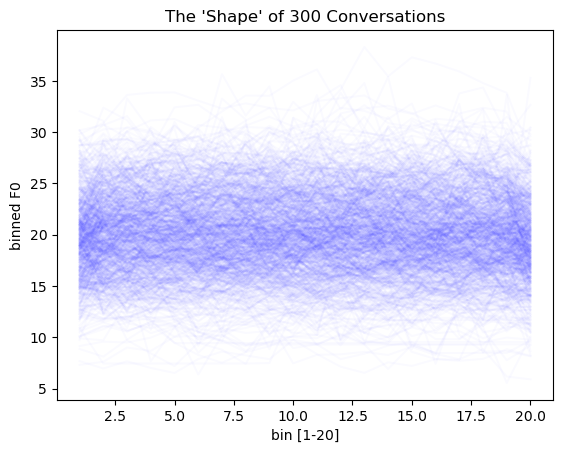

In [328]:
palette = sns.color_palette(['blue'], len(convShapeDf["potentialOutPath"].unique()))
sns.lineplot(data=convShapeDf, x="bin", y="means", hue="potentialOutPath", color="blue", palette = palette, alpha=.02, legend=False)
plt.title("The 'Shape' of 300 Conversations")
plt.xlabel("bin [1-20]")
plt.ylabel("binned F0")

Text(0, 0.5, 'binned F0')

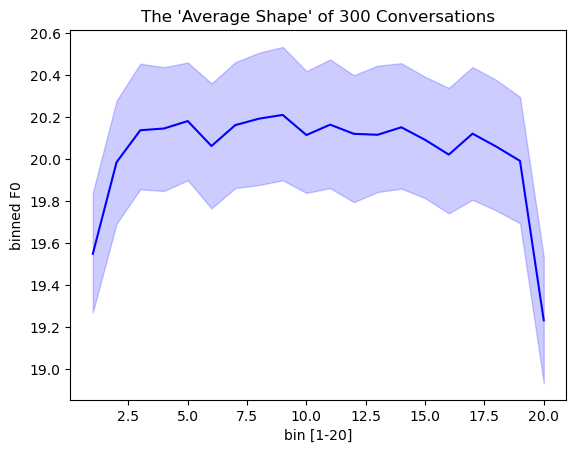

In [329]:
sns.lineplot(data=convShapeDf, x="bin", y="means", color="blue", legend=False)
plt.title("The 'Average Shape' of 300 Conversations")
plt.xlabel("bin [1-20]")
plt.ylabel("binned F0")

Text(0, 0.5, 'binned F0')

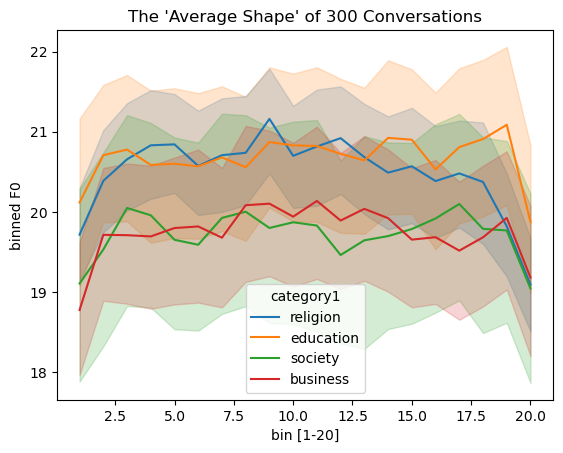

In [330]:
catList = ["religion", "business", "society", "education"]
sns.lineplot(data=convShapeDf[convShapeDf["category1"].apply(lambda x: x in catList)], x="bin", y="means", color="blue", hue="category1")
plt.title("The 'Average Shape' of 300 Conversations")
plt.xlabel("bin [1-20]")
plt.ylabel("binned F0")

In [331]:
#sanity check: convShapeDf[convShapeDf["means"] ==
stackedMeans = np.array(stackedMeans)

In [332]:
stackedMeans.shape

(791, 20)

In [333]:
pca = PCA(2)
components = pca.fit_transform(stackedMeans)

In [334]:
#sanity check: convShapeDf[convShapeDf["means"] == 0]
pca.explained_variance_ratio_

array([0.82809641, 0.02877863])

<Axes: ylabel='Density'>

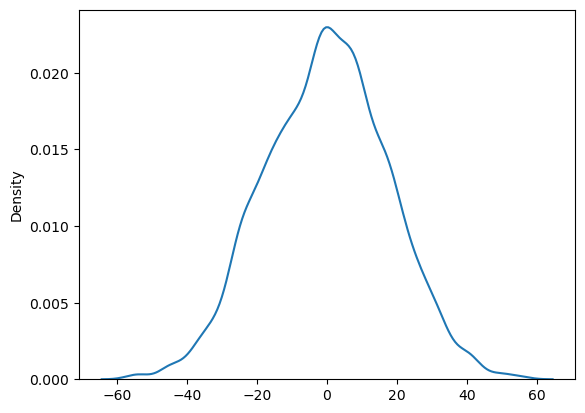

In [335]:
sns.kdeplot(components[:,0], bw_adjust=.7) 

componentsDf = pd.DataFrame()

In [336]:
componentsDf = pd.DataFrame(components)
componentsDf.columns = ["pc1", "pc2"]
componentsDf["potentialOutPath"] = pathList

In [337]:
componentsDf = pd.merge(componentsDf, df[["potentialOutPath", "wCount", "transcript", "popularityScore", "category1", "category2", "category3", "cleanDatesLoc", "enclosure"]], on="potentialOutPath")

Text(0.5, 1.0, 'PC Scatterplot')

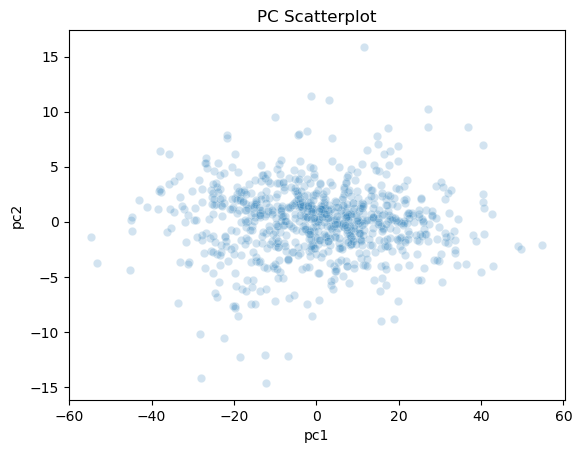

In [357]:
sns.scatterplot(data=componentsDf, x="pc1", y="pc2", alpha=.2, legend=False)
plt.title("PC Scatterplot")

<Axes: xlabel='pc1', ylabel='Density'>

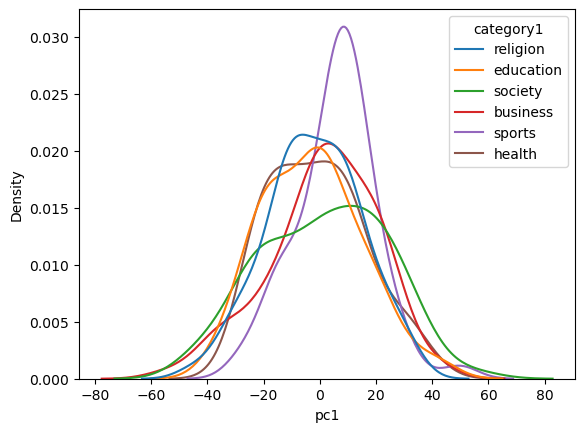

In [339]:
sns.kdeplot(data=componentsDf[componentsDf["category1"].apply(lambda x: x in ["religion", "business", "education", "society", "health", "sports"])], x="pc1", hue="category1", common_norm=False)

<Axes: xlabel='pc2', ylabel='Density'>

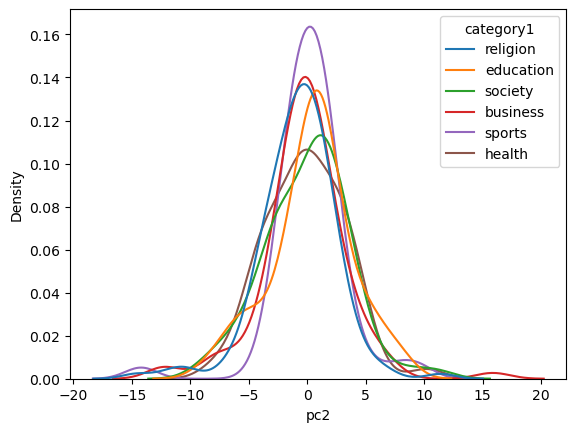

In [340]:

sns.kdeplot(data=componentsDf[componentsDf["category1"].apply(lambda x: x in ["religion", "business", "education", "society", "health", "sports"])], x="pc2", hue="category1", common_norm=False)

In [341]:
lowPc1 = componentsDf.loc[componentsDf["pc1"] < -20, "potentialOutPath"]


In [342]:
componentsDf["pc1Bins"] = pd.qcut(componentsDf["pc1"], 4) 
componentsDf["pc2Bins"] = pd.qcut(componentsDf["pc2"], 4) 

In [343]:
convShapeDf = pd.merge(convShapeDf, componentsDf[["potentialOutPath", "pc1", "pc2", "pc1Bins", "pc2Bins"]], on="potentialOutPath", how="left") 

Text(0, 0.5, 'F0 Binned Mean')

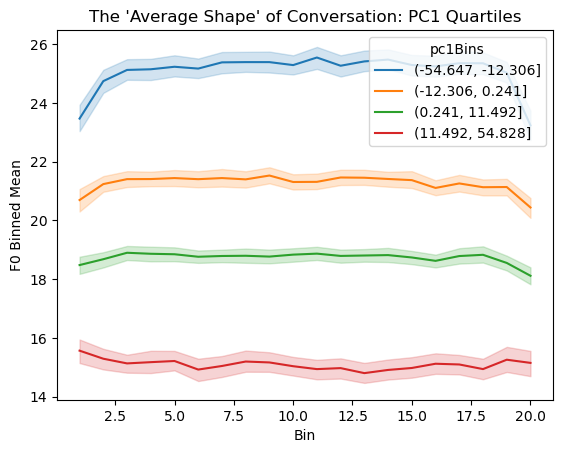

In [352]:
sns.lineplot(data=convShapeDf, x="bin", y="means", hue="pc1Bins")
plt.title("The 'Average Shape' of Conversation: PC1 Quartiles")
plt.xlabel("Bin")
plt.ylabel("F0 Binned Mean")

Text(0, 0.5, 'F0 Binned Mean')

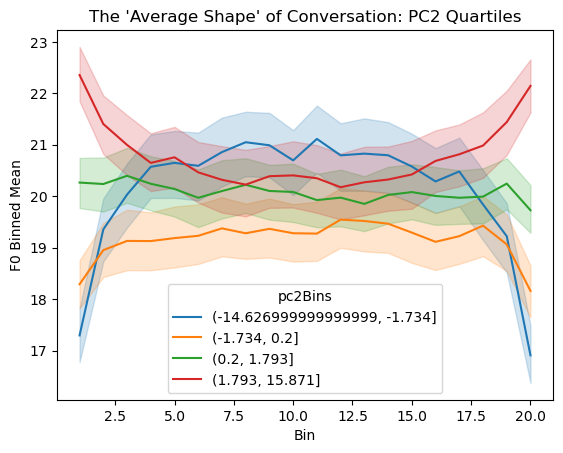

In [353]:
#lowPc1 = list(componentsDf.loc[componentsDf["pc1"] < -20, "potentialOutPath"]) 
#lowPc1Df = convShapeDf[convShapeDf["potentialOutPath"].apply(lambda x: x in lowPc1)]


sns.lineplot(data=convShapeDf, x="bin", y="means", hue="pc2Bins")
plt.title("The 'Average Shape' of Conversation: PC2 Quartiles")
plt.xlabel("Bin")
plt.ylabel("F0 Binned Mean")

In [346]:
sortedComps = componentsDf.sort_values("pc2")

In [347]:
convNum = 1
sortedComps.iloc[convNum]["enclosure"]
fName = sortedComps.iloc[convNum]["potentialOutPath"]

In [348]:
convShapeDf

,means,potentialOutPath,bin,wCount,transcript,popularityScore,category1,category2,category3,cleanDatesLoc,enclosure,pc1,pc2,pc1Bins,pc2Bins
0,24.169662,/shared/3/projects/benlitterer/podcastData/pro...,1,6949,I would like to thank you for your pleasure. I...,0,religion,spirituality,None,2020-05-31 23:06:57+00:00,https://feeds.soundcloud.com/stream/831879580-...,-44.827782,-0.870282,"(-54.647, -12.306]","(-1.734, 0.2]"
1,26.395568,/shared/3/projects/benlitterer/podcastData/pro...,2,6949,I would like to thank you for your pleasure. I...,0,religion,spirituality,None,2020-05-31 23:06:57+00:00,https://feeds.soundcloud.com/stream/831879580-...,-44.827782,-0.870282,"(-54.647, -12.306]","(-1.734, 0.2]"
2,28.256392,/shared/3/projects/benlitterer/podcastData/pro...,3,6949,I would like to thank you for your pleasure. I...,0,religion,spirituality,None,2020-05-31 23:06:57+00:00,https://feeds.soundcloud.com/stream/831879580-...,-44.827782,-0.870282,"(-54.647, -12.306]","(-1.734, 0.2]"
3,28.764855,/shared/3/projects/benlitterer/podcastData/pro...,4,6949,I would like to thank you for your pleasure. I...,0,religion,spirituality,None,2020-05-31 23:06:57+00:00,https://feeds.soundcloud.com/stream/831879580-...,-44.827782,-0.870282,"(-54.647, -12.306]","(-1.734, 0.2]"
4,29.237594,/shared/3/projects/benlitterer/podcastData/pro...,5,6949,I would like to thank you for your pleasure. I...,0,religion,spirituality,None,2020-05-31 23:06:57+00:00,https://feeds.soundcloud.com/stream/831879580-...,-44.827782,-0.870282,"(-54.647, -12.306]","(-1.734, 0.2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15815,18.609767,/shared/3/projects/benlitterer/podcastData/pro...,16,1475,"Alright, so it's about like 2005 my friends th...",0,comedy,None,None,2020-05-22 17:56:18+00:00,https://anchor.fm/s/208b1828/podcast/play/1414...,-1.317810,-2.235799,"(-12.306, 0.241]","(-14.626999999999999, -1.734]"
15816,23.419648,/shared/3/projects/benlitterer/podcastData/pro...,17,1475,"Alright, so it's about like 2005 my friends th...",0,comedy,None,None,2020-05-22 17:56:18+00:00,https://anchor.fm/s/208b1828/podcast/play/1414...,-1.317810,-2.235799,"(-12.306, 0.241]","(-14.626999999999999, -1.734]"
15817,21.697673,/shared/3/projects/benlitterer/podcastData/pro...,18,1475,"Alright, so it's about like 2005 my friends th...",0,comedy,None,None,2020-05-22 17:56:18+00:00,https://anchor.fm/s/208b1828/podcast/play/1414...,-1.317810,-2.235799,"(-12.306, 0.241]","(-14.626999999999999, -1.734]"
15818,20.654730,/shared/3/projects/benlitterer/podcastData/pro...,19,1475,"Alright, so it's about like 2005 my friends th...",0,comedy,None,None,2020-05-22 17:56:18+00:00,https://anchor.fm/s/208b1828/podcast/play/1414...,-1.317810,-2.235799,"(-12.306, 0.241]","(-14.626999999999999, -1.734]"


In [349]:
currConv

,means,potentialOutPath,bin,wCount,transcript,popularityScore,category1,category2,category3,cleanDatesLoc,enclosure,pc1Bins_x,pc2Bins_x,pc1,pc2,pc1Bins_y,pc2Bins_y
11440,18.311326,/shared/3/projects/benlitterer/podcastData/pro...,1,979,This episode is brought to you by Google Pixel...,0,sports,football,None,2020-05-14 17:52:46+00:00,https://pdst.fm/e/traffic.megaphone.fm/NSM1485...,"(-54.647, -12.306]","(-14.633, -1.733]",-28.037058,-14.21164,"(-54.647, -12.306]","(-14.633, -1.733]"
11441,22.135066,/shared/3/projects/benlitterer/podcastData/pro...,2,979,This episode is brought to you by Google Pixel...,0,sports,football,None,2020-05-14 17:52:46+00:00,https://pdst.fm/e/traffic.megaphone.fm/NSM1485...,"(-54.647, -12.306]","(-14.633, -1.733]",-28.037058,-14.21164,"(-54.647, -12.306]","(-14.633, -1.733]"
11442,33.278541,/shared/3/projects/benlitterer/podcastData/pro...,3,979,This episode is brought to you by Google Pixel...,0,sports,football,None,2020-05-14 17:52:46+00:00,https://pdst.fm/e/traffic.megaphone.fm/NSM1485...,"(-54.647, -12.306]","(-14.633, -1.733]",-28.037058,-14.21164,"(-54.647, -12.306]","(-14.633, -1.733]"
11443,30.096690,/shared/3/projects/benlitterer/podcastData/pro...,4,979,This episode is brought to you by Google Pixel...,0,sports,football,None,2020-05-14 17:52:46+00:00,https://pdst.fm/e/traffic.megaphone.fm/NSM1485...,"(-54.647, -12.306]","(-14.633, -1.733]",-28.037058,-14.21164,"(-54.647, -12.306]","(-14.633, -1.733]"
11444,26.477632,/shared/3/projects/benlitterer/podcastData/pro...,5,979,This episode is brought to you by Google Pixel...,0,sports,football,None,2020-05-14 17:52:46+00:00,https://pdst.fm/e/traffic.megaphone.fm/NSM1485...,"(-54.647, -12.306]","(-14.633, -1.733]",-28.037058,-14.21164,"(-54.647, -12.306]","(-14.633, -1.733]"
11445,25.913096,/shared/3/projects/benlitterer/podcastData/pro...,6,979,This episode is brought to you by Google Pixel...,0,sports,football,None,2020-05-14 17:52:46+00:00,https://pdst.fm/e/traffic.megaphone.fm/NSM1485...,"(-54.647, -12.306]","(-14.633, -1.733]",-28.037058,-14.21164,"(-54.647, -12.306]","(-14.633, -1.733]"
11446,23.391274,/shared/3/projects/benlitterer/podcastData/pro...,7,979,This episode is brought to you by Google Pixel...,0,sports,football,None,2020-05-14 17:52:46+00:00,https://pdst.fm/e/traffic.megaphone.fm/NSM1485...,"(-54.647, -12.306]","(-14.633, -1.733]",-28.037058,-14.21164,"(-54.647, -12.306]","(-14.633, -1.733]"
11447,25.158372,/shared/3/projects/benlitterer/podcastData/pro...,8,979,This episode is brought to you by Google Pixel...,0,sports,football,None,2020-05-14 17:52:46+00:00,https://pdst.fm/e/traffic.megaphone.fm/NSM1485...,"(-54.647, -12.306]","(-14.633, -1.733]",-28.037058,-14.21164,"(-54.647, -12.306]","(-14.633, -1.733]"
11448,24.039881,/shared/3/projects/benlitterer/podcastData/pro...,9,979,This episode is brought to you by Google Pixel...,0,sports,football,None,2020-05-14 17:52:46+00:00,https://pdst.fm/e/traffic.megaphone.fm/NSM1485...,"(-54.647, -12.306]","(-14.633, -1.733]",-28.037058,-14.21164,"(-54.647, -12.306]","(-14.633, -1.733]"
11449,22.395959,/shared/3/projects/benlitterer/podcastData/pro...,10,979,This episode is brought to you by Google Pixel...,0,sports,football,None,2020-05-14 17:52:46+00:00,https://pdst.fm/e/traffic.megaphone.fm/NSM1485...,"(-54.647, -12.306]","(-14.633, -1.733]",-28.037058,-14.21164,"(-54.647, -12.306]","(-14.633, -1.733]"


<Axes: xlabel='bin', ylabel='means'>

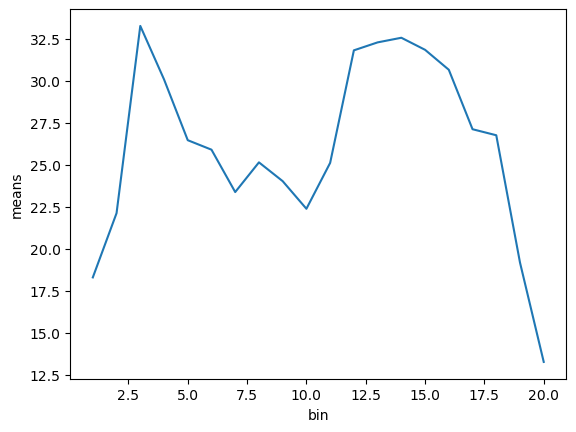

In [350]:
currConv = convShapeDf[convShapeDf["potentialOutPath"] == fName]
sns.lineplot(data=currConv, x="bin", y="means")

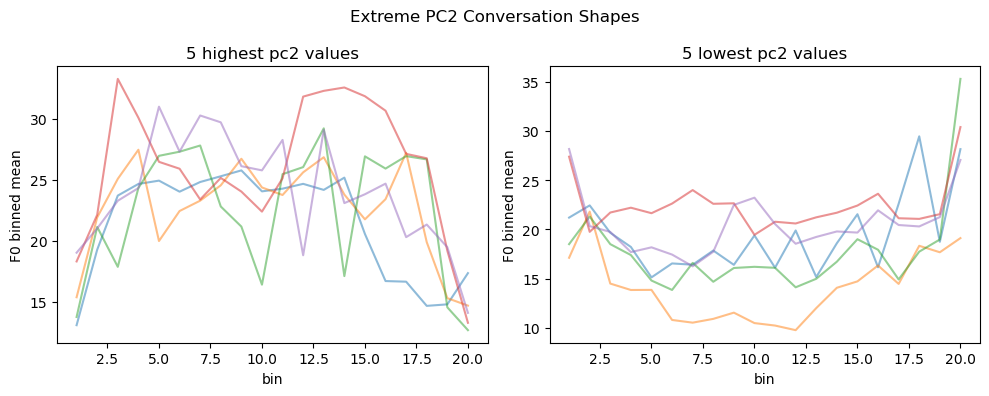

In [354]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
#get lowest pc2 conversations and plot
#get dataframe with lowest and highest pc2
top5 = list(convShapeDf.sort_values("pc2")["potentialOutPath"].unique())[:5]
bottom5 = list(convShapeDf.sort_values("pc2", ascending=False)["potentialOutPath"].unique())[:5]

extremeShapeDf = convShapeDf[convShapeDf["potentialOutPath"].apply(lambda x: x in top5)]
sns.lineplot(extremeShapeDf, x="bin", y="means", hue="potentialOutPath", legend=False, alpha=.5, ax=axs[0])
axs[0].set_title("5 highest pc2 values")
axs[0].set_ylabel("F0 binned mean")

extremeShapeDf = convShapeDf[convShapeDf["potentialOutPath"].apply(lambda x: x in bottom5)]
sns.lineplot(extremeShapeDf, x="bin", y="means", hue="potentialOutPath", legend=False, alpha=.5, ax=axs[1])
axs[1].set_title("5 lowest pc2 values")
axs[1].set_ylabel("F0 binned mean")

plt.suptitle("Extreme PC2 Conversation Shapes")
plt.tight_layout()

In [280]:
fPath = '/shared/3/projects/benlitterer/podcastData/prosodyMerged/floydMonth/chrt.fm/aF/httpschrt.fmtrackFFFE8Btraffic.megaphone.fmTAB1913478400.mp3MERGED'
currDf = pd.read_csv(fPath)

In [291]:
currDf[["content", "F0semitoneFrom27.5Hz_sma3nz"]].tail(20)

,content,F0semitoneFrom27.5Hz_sma3nz
1630,and,0.000000
1631,we,22.241638
1632,'ll,10.294051
1633,see,5.837762
1634,you,24.863700
1635,again,16.851070
1636,soon,5.235338
1637,.,0.275217
1638,NaN,0.275217
1639,[,3.811105


In [282]:
"".join(list(currDf["content"].dropna()))

' [Music] Hey there and welcome back to Take One, the podcast that brings you just one magnificent page of Talmud every day. And our guest today to discuss the mighty page 69 in Mashekha Shabbat is one of my favorite thinkers, teachers, scholars, professor, Dr. Erica Brown. She is an associate professor at George Washington University and the director of their Mayberg Center and the author of an amazing book that came out recently Esther Power, Fate, and Fagility in Exile. Hello. Hi, Leo. It\'s so nice to be here. Thank you for this break in my day. I am very grateful because I know how crazy your day is and so I want to jump right in to a passage that as I read it kind of stopped me in my tracks because it felt incredibly relevant. Here it is. Rav Huna said, "One who was walking along the way or in the desert and he does not know when Shabbat occurs, he counts six days from the day that he realized that he lost track of Shabbat and then observes one day as Shabbat. Chia B\'arav says h

In [286]:
list(convShapeDf[convShapeDf["potentialOutPath"] == fPath].head(1)["enclosure"])[0]

'https://chrt.fm/track/FFFE8B/traffic.megaphone.fm/TAB1913478400.mp3'

In [137]:
import re

In [138]:
wordList = []
featureList = []
for i, path in tqdm(enumerate(fileSample[:500])): 
    feature = 'F0semitoneFrom27.5Hz_sma3nz'
    currDf = pd.read_csv(path).dropna(subset=[feature, "content"])
    currDf = currDf[currDf[feature] > 0]

    tokens = list(currDf["content"]) 
    features = list(currDf[feature])
    currFeatures = []
    currWord = ""

    while i < len(tokens)-1: 
        #append current data to our running variables 
        currWord += tokens[i]
        currFeatures.append(features[i])

        #determine if we are at the end of a word 
        nextWord = tokens[i+1]
        if nextWord[0] == " " or (("[" in currWord and "]" in nextWord) or ("(" in currWord and ")" in nextWord)): 
            #if so, append our running data to our final lists
            wordList.append(re.sub("[^\w]", "", currWord))
            featureList.append(np.nanmean(currFeatures))
            currWord = ""
            currFeatures = []
        
        i += 1

    #at the end, just append our running data to our final lists
    wordList.append(re.sub("[^\w]", "", currWord)) 
    featureList.append(np.nanmean(currFeatures))
    
    """
    for i, row in currDf.iterrows(): 
        currToken = row["content"]
        if currToken != None and currToken ==  currToken: 
            currToken = currToken.strip()
            currFeature = row[feature]
            tokList.append(currToken)
            featureList.append(currFeature)
    """


0it [00:00, ?it/s]

1it [00:00,  4.27it/s]/tmp/ipykernel_500975/1034185156.py:31: RuntimeWarning: Mean of empty slice
  featureList.append(np.nanmean(currFeatures))
3it [00:01,  2.80it/s]/tmp/ipykernel_500975/1034185156.py:31: RuntimeWarning: Mean of empty slice
  featureList.append(np.nanmean(currFeatures))
4it [00:01,  3.39it/s]/tmp/ipykernel_500975/1034185156.py:31: RuntimeWarning: Mean of empty slice
  featureList.append(np.nanmean(currFeatures))
5it [00:01,  3.01it/s]/tmp/ipykernel_500975/1034185156.py:31: RuntimeWarning: Mean of empty slice
  featureList.append(np.nanmean(currFeatures))
7it [00:02,  3.23it/s]/tmp/ipykernel_500975/1034185156.py:31: RuntimeWarning: Mean of empty slice
  featureList.append(np.nanmean(currFeatures))
10it [00:04,  1.56it/s]/tmp/ipykernel_500975/1034185156.py:31: RuntimeWarning: Mean of empty slice
  featureList.append(np.nanmean(currFeatures))
/tmp/ipykernel_500975/1034185156.py:31: RuntimeWarning: Mean of empty slice
  featureList.append(np.nanmean(currFeatures))
12it [

In [170]:
tokDf = pd.DataFrame({"token":wordList, "feature":featureList})

In [171]:
tokDf = tokDf.groupby("token").agg(list)

In [172]:
tokDf["len"] = tokDf["feature"].apply(len)
tokDf["variance"] = tokDf["feature"].apply(np.var)
tokDf["stDev"] = tokDf["feature"].apply(np.std)
#tokDf[""] = tokDf["feature"].apply(np.var)

In [173]:
tokDf = tokDf[tokDf["len"] > 50]

In [174]:
tokDf.shape

(2371, 4)

In [175]:
tokDf = tokDf.reset_index()

In [177]:
tokDf["upper"] = tokDf["token"].apply(lambda x: x.isupper()) 

In [178]:
tokDf.head() 

,token,feature,len,variance,stDev,upper
0,,"[5.1958617600000006, 24.8813975, nan, 40.54095...",11428,NaN,NaN,False
1,1,"[24.385090857142853, 28.900451500000003, 22.61...",125,93.875651,9.688945,False
2,10,"[37.352537435897446, 14.04844993103448, 20.450...",536,71.682923,8.466577,False
3,100,"[7.305745454545454, 23.146907703125002, 27.473...",218,59.914376,7.740438,False
4,11,"[25.71521282758621, 11.7645, 14.06443342857142...",137,72.470495,8.512960,False


In [179]:
tokDf = tokDf[tokDf["token"].apply(lambda x: x.isupper()) == False]

In [180]:
tokDf.shape

(2351, 6)

In [181]:
tokDf = tokDf[tokDf["token"].apply(lambda x:len(x)) > 1]

In [182]:
tokDf.shape

(2340, 6)

In [183]:
def getHist(inList): 
    counts, edges = np.histogram(inList, bins=np.arange(0, 65, 5))
    listLen = sum(counts) 
    densities = [count / listLen for count in counts]
    return densities 
#tokDf.head(20)[["counts", "props", "bins"]] = 

tokDf["densities"] = tokDf["feature"].apply(getHist) 


In [184]:
densityMatrix = np.array(list(tokDf["densities"]))

In [185]:
pca = PCA(4)
components = pca.fit_transform(densityMatrix)

In [186]:
pca.explained_variance_ratio_

array([0.42678829, 0.206659  , 0.13150884, 0.09960317])

In [187]:
tokDf[["pc1", "pc2", "pc3", "pc4"]] = components

In [188]:
tokDf.head() 

,token,feature,len,variance,stDev,upper,densities,pc1,pc2,pc3,pc4
2,10,"[37.352537435897446, 14.04844993103448, 20.450...",536,71.682923,8.466577,False,"[0.05970149253731343, 0.10820895522388059, 0.1...",-0.018416,0.000834,0.012768,-0.012956
3,100,"[7.305745454545454, 23.146907703125002, 27.473...",218,59.914376,7.740438,False,"[0.027522935779816515, 0.0779816513761468, 0.1...",0.011117,-0.029164,-0.011524,0.021741
4,11,"[25.71521282758621, 11.7645, 14.06443342857142...",137,72.470495,8.512960,False,"[0.0364963503649635, 0.10218978102189781, 0.14...",0.019785,-0.015179,-0.010126,-0.022215
5,12,"[9.891046862068965, 18.2634265, 5.370602111111...",252,57.241313,7.565799,False,"[0.03968253968253968, 0.07539682539682539, 0.1...",-0.045156,-0.063611,-0.005209,0.012917
6,13,"[8.273955384615384, 9.518920413793104, 24.8602...",101,64.331006,8.020661,False,"[0.039603960396039604, 0.0891089108910891, 0.2...",-0.091605,0.022845,0.051994,0.055367


<Axes: xlabel='pc3', ylabel='pc4'>

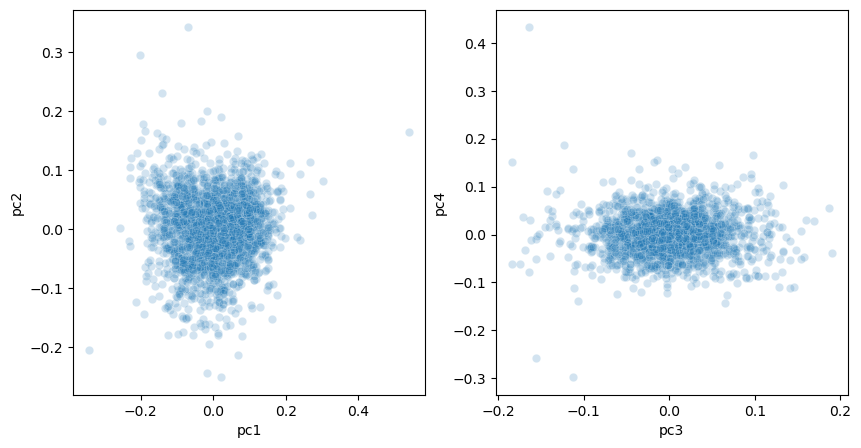

In [189]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(data=tokDf, x="pc1", y="pc2", alpha=.2, legend=False, ax=axs[0])
sns.scatterplot(data=tokDf, x="pc3", y="pc4", alpha=.2, legend=False, ax=axs[1])

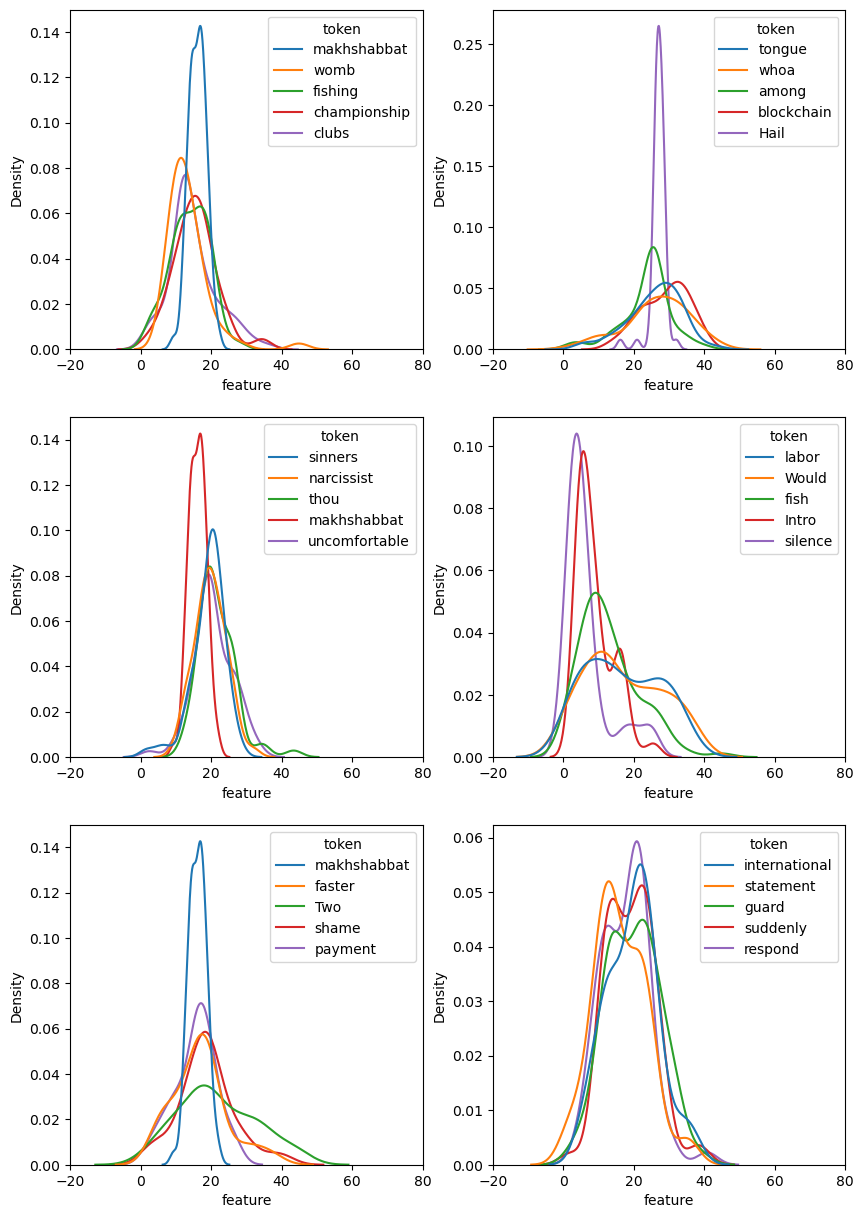

In [190]:
rows = 3
fig, axs = plt.subplots(rows, 2, figsize=(10, 15))

for row in range(rows):
    pcString = f"pc{row+1}" 
    topPc1 = tokDf.sort_values(pcString).head()[["token", "feature"]].explode("feature")
    bottomPc1 = tokDf.sort_values(pcString).tail()[["token", "feature"]].explode("feature")

    axLeft  = axs[row,0]
    axRight = axs[row,1]
    
    sns.kdeplot(topPc1, x="feature", hue="token", ax=axLeft , common_norm=False)
    axRight.set_xlim(-20, 80)
    sns.kdeplot(bottomPc1, x="feature", hue="token", ax=axRight , common_norm=False)
    axLeft.set_xlim(-20, 80)

In [191]:
tokDf.sort_values("pc1")

,token,feature,len,variance,stDev,upper,densities,pc1,pc2,pc3,pc4
1369,makhshabbat,"[14.922207800925925, 19.044353736511265, 16.71...",72,5.808344,2.410051,False,"[0.0, 0.013888888888888888, 0.3472222222222222...",-0.342421,-0.205642,-0.183809,0.151279
2318,womb,"[28.1506275625, 12.31783261904762, 13.69782621...",56,36.814903,6.067529,False,"[0.0, 0.30357142857142855, 0.4107142857142857,...",-0.307979,0.183175,0.041325,0.035294
973,fishing,"[12.649036550264551, 9.008506523809524, 11.198...",52,28.916884,5.377442,False,"[0.09615384615384616, 0.15384615384615385, 0.2...",-0.258164,0.001854,-0.086010,0.018826
585,championship,"[33.983421920634925, 18.051893424242422, 16.56...",65,37.631514,6.134453,False,"[0.03076923076923077, 0.13846153846153847, 0.3...",-0.231395,-0.020597,-0.047899,0.043283
623,clubs,"[24.808278999999995, 27.44503806451613, 26.799...",107,45.546944,6.748848,False,"[0.08411214953271028, 0.06542056074766354, 0.4...",-0.230816,0.104623,0.097521,0.166065
...,...,...,...,...,...,...,...,...,...,...,...
2153,tongue,"[4.582916681089744, 12.609985985347985, 16.928...",377,60.925319,7.805467,False,"[0.013262599469496022, 0.03183023872679045, 0....",0.266618,0.059670,-0.024826,0.019729
2294,whoa,"[10.555863647435896, 41.4154985625, 19.6302460...",52,81.351908,9.019529,False,"[0.019230769230769232, 0.057692307692307696, 0...",0.267851,0.113372,0.024623,-0.023939
383,among,"[32.456616333333336, 3.509204928571428, 39.048...",108,48.758158,6.982704,False,"[0.037037037037037035, 0.009259259259259259, 0...",0.273014,0.024661,-0.035074,0.137390
501,blockchain,"[27.008633411764706, 34.87215884848485, 30.642...",59,43.012031,6.558356,False,"[0.0, 0.0, 0.03389830508474576, 0.067796610169...",0.302370,0.082553,-0.007597,-0.035444


In [192]:
tokDf["pc1Bins"] = pd.qcut(tokDf["pc1"], 4) 
tokDf["pc2Bins"] = pd.qcut(tokDf["pc2"], 4) 
tokDf["pc3Bins"] = pd.qcut(tokDf["pc3"], 4) 
tokDf["pc4Bins"] = pd.qcut(tokDf["pc4"], 4) 

In [193]:
tokDf.head() 

,token,feature,len,variance,stDev,upper,densities,pc1,pc2,pc3,pc4,pc1Bins,pc2Bins,pc3Bins,pc4Bins
2,10,"[37.352537435897446, 14.04844993103448, 20.450...",536,71.682923,8.466577,False,"[0.05970149253731343, 0.10820895522388059, 0.1...",-0.018416,0.000834,0.012768,-0.012956,"(-0.0604, 0.0041]","(-0.0357, 0.00139]","(-0.000993, 0.0259]","(-0.0226, -0.00113]"
3,100,"[7.305745454545454, 23.146907703125002, 27.473...",218,59.914376,7.740438,False,"[0.027522935779816515, 0.0779816513761468, 0.1...",0.011117,-0.029164,-0.011524,0.021741,"(0.0041, 0.0618]","(-0.0357, 0.00139]","(-0.0251, -0.000993]","(0.0217, 0.433]"
4,11,"[25.71521282758621, 11.7645, 14.06443342857142...",137,72.470495,8.512960,False,"[0.0364963503649635, 0.10218978102189781, 0.14...",0.019785,-0.015179,-0.010126,-0.022215,"(0.0041, 0.0618]","(-0.0357, 0.00139]","(-0.0251, -0.000993]","(-0.0226, -0.00113]"
5,12,"[9.891046862068965, 18.2634265, 5.370602111111...",252,57.241313,7.565799,False,"[0.03968253968253968, 0.07539682539682539, 0.1...",-0.045156,-0.063611,-0.005209,0.012917,"(-0.0604, 0.0041]","(-0.252, -0.0357]","(-0.0251, -0.000993]","(-0.00113, 0.0217]"
6,13,"[8.273955384615384, 9.518920413793104, 24.8602...",101,64.331006,8.020661,False,"[0.039603960396039604, 0.0891089108910891, 0.2...",-0.091605,0.022845,0.051994,0.055367,"(-0.343, -0.0604]","(0.00139, 0.0374]","(0.0259, 0.19]","(0.0217, 0.433]"


In [194]:
#create what will end up being our x axis 
densityBins = np.arange(0, 60, 5)
tokDf["densityBins"] = [densityBins for i in range(len(tokDf))]

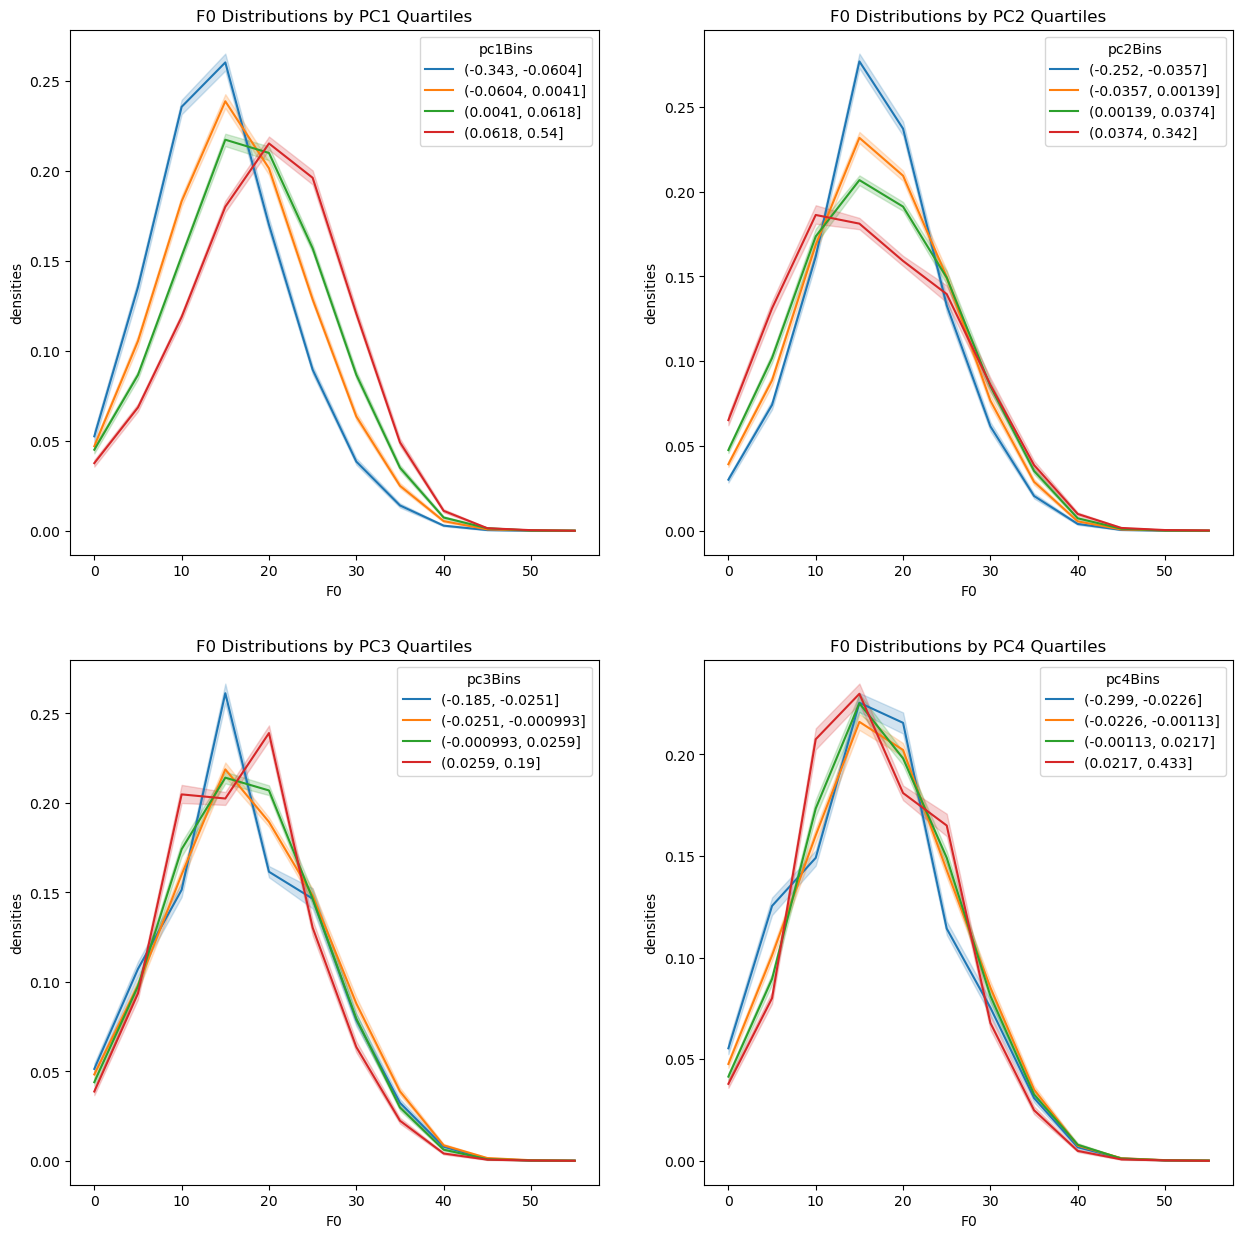

In [195]:
rows = 2
cols = 2 
fig, axs = plt.subplots(rows, cols, figsize=(15, 15))

i = 0 
for col in range(cols): 
    for row in range(rows):
        ax = axs[col,row]
        pcBinString = f"pc{i+1}Bins" 
        #topPc1 = tokDf[tokDf["pc1Bins"]][["token", "feature"]].explode("feature")
        #bottomPc1 = tokDf.sort_values(pcString).tail()[["token", "feature"]].explode("feature")

        exploded = tokDf[["densities", "densityBins", pcBinString]].explode(["densities", "densityBins"])
        sns.lineplot(exploded, x="densityBins",y="densities", hue=pcBinString, ax=ax)
        #ax.set_xlim(-20, 80)
        ax.set_title(f"F0 Distributions by PC{i+1} Quartiles")
        ax.set_xlabel("F0")
        #sns.kdeplot(bottomPc1, x="feature", hue="token", ax=axRight , common_norm=False)
        #axLeft.set_xlim(-20, 80)
        i += 1

In [196]:
#just print out words with highest and lowest principal componenet scores 
for i in range(4): 
    currString = f"pc{i+1}"
    sortedDf = tokDf.sort_values(currString)
    print(f"high pc{i+1} words: {list(sortedDf['token'].tail(20))}")
    print(f"low pc{i+1} words:{list(sortedDf['token'].head(20))} ")

high pc1 words: ['Adam', 'known', 'ran', 'By', 'lady', 'dream', 'whoever', 'leading', 'yall', 'wherever', 'remind', 'shop', 'Psalm', 'Abraham', 'Forget', 'tongue', 'whoa', 'among', 'blockchain', 'Hail']
low pc1 words:['makhshabbat', 'womb', 'fishing', 'championship', 'clubs', 'Julius', 'conflict', 'century', 'traditional', 'percent', 'facts', 'rates', 'potential', 'subscribe', 'Intro', 'justice', 'patient', 'righteousness', 'speech', 'desk'] 
high pc2 words: ['Kelly', 'except', 'For', 'His', 'patient', 'effect', 'Music', 'ice', 'protests', 'Hail', 'aspects', 'desk', 'projects', 'womb', 'At', 'labor', 'Would', 'fish', 'Intro', 'silence']
low pc2 words:['sinners', 'narcissist', 'thou', 'makhshabbat', 'uncomfortable', 'developing', 'original', 'inspired', 'movies', 'released', 'mostly', 'Chinese', 'encouraging', 'James', 'coaching', 'regardless', 'winning', 'recording', 'achieve', 'dude'] 
high pc3 words: ['paint', 'zone', 'model', 'opposite', 'seek', 'churches', 'Charles', 'administratio

In [474]:
rows = 2
cols = 2 
fig, axs = plt.subplots(rows, cols, figsize=(15, 15))

i = 0 
for col in range(cols): 
    for row in range(rows):
        ax = axs[col,row]
        pcBinString = f"pc{i+1}Bins" 
        #topPc1 = tokDf[tokDf["pc1Bins"]][["token", "feature"]].explode("feature")
        #bottomPc1 = tokDf.sort_values(pcString).tail()[["token", "feature"]].explode("feature")

        exploded = tokDf[["densities", "densityBins", pcBinString]].explode(["densities", "densityBins"])
        sns.lineplot(exploded, x="densityBins",y="densities", hue=pcBinString, ax=ax)
        #ax.set_xlim(-20, 80)
        ax.set_title(f"F0 Distributions by PC{i+1} Quartiles")
        ax.set_xlabel("F0")
        #sns.kdeplot(bottomPc1, x="feature", hue="token", ax=axRight , common_norm=False)
        #axLeft.set_xlim(-20, 80)
        i += 1

,token,feature,len,variance,stDev,densities,pc1,pc2,pc3,pc4
103,film,"[7.825602833333334, 26.40024179310345, 34.2273...",91,57.262031,7.567168,"[0.10989010989010989, 0.15384615384615385, 0.2...",-0.169485,0.045675,-0.014187,0.006970
131,important,"[13.670832704545456, 23.806959958333334, 18.49...",83,42.237322,6.499025,"[0.024096385542168676, 0.04819277108433735, 0....",-0.166018,-0.127114,0.006233,0.050160
188,podcast,"[6.446151266666666, 18.464106931034483, 17.420...",91,58.108555,7.622897,"[0.13186813186813187, 0.23076923076923078, 0.1...",-0.162855,0.100027,-0.013596,-0.024851
185,person,"[21.82692815789473, 13.0611608125, 24.50457435...",90,58.997983,7.681014,"[0.022222222222222223, 0.15555555555555556, 0....",-0.159018,0.016058,0.003535,0.125112
98,episode,"[15.82550503125, 17.20879920689655, 4.82118216...",121,62.533202,7.907794,"[0.1322314049586777, 0.18181818181818182, 0.20...",-0.158435,0.065964,0.007670,-0.033381
...,...,...,...,...,...,...,...,...,...,...
27,M,"[8.729570428571428, 27.813601, 44.909454090909...",98,189.240028,13.756454,"[0.09183673469387756, 0.061224489795918366, 0....",0.131472,0.054206,0.021731,-0.046533
225,then,"[19.577905290322583, 30.7416090625, 23.0529015...",551,98.031968,9.901109,"[0.047186932849364795, 0.06896551724137931, 0....",0.135581,-0.031388,0.025426,-0.004371
266,woman,"[32.51012933333334, 36.4168525625, 35.22784862...",92,97.817973,9.890297,"[0.043478260869565216, 0.043478260869565216, 0...",0.136664,-0.034174,-0.024601,0.007305
157,mom,"[21.685954444444445, 36.52719281818182, 47.129...",89,80.923570,8.995753,"[0.02247191011235955, 0.07865168539325842, 0.0...",0.161242,-0.078774,0.009793,0.002976


In [96]:
print(list(tokDf.sort_values("pc1")["token"].head(20))) 
print(list(tokDf.sort_values("pc1")["token"].tail(20))) 

['m', 'g', 'n', 'am', 'dude', 'One', 'ar', 'million', '$', 'known', 'mom', 'a', 'New', 'allow', '-', 'y', 'only', 'knew', 'I', 'o']
['space', 'training', 'football', 'stress', 'Wales', 'culture', 'control', 'future', 'awesome', 'history', 'country', 'coach', 'completely', 'support', 'students', 'system', 'State', 'takes', 'University', 'relationships']


In [316]:
wordList = []
featureList = []
for i, path in tqdm(enumerate(fileSample[:1000])): 
    feature = 'F0semitoneFrom27.5Hz_sma3nz'
    currDf = pd.read_csv(path).dropna(subset=[feature, "content"])
    currDf = currDf[currDf[feature] > 0]

    tokens = list(currDf["content"]) 
    features = list(currDf[feature])
    currFeatures = []
    currWord = ""

    while i < len(tokens)-1: 
        #append current data to our running variables 
        currWord += tokens[i]
        currFeatures.append(features[i])

        #determine if we are at the end of a word 
        nextWord = tokens[i+1]
        if nextWord[0] == " " or (("[" in currWord and "]" in nextWord) or ("(" in currWord and ")" in nextWord)): 
            #if so, append our running data to our final lists
            wordList.append(currWord.lower())
            featureList.append(np.nanmean(currFeatures))
            currWord = ""
            currFeatures = []
        
        i += 1

    #at the end, just append our running data to our final lists
    wordList.append(currWord.lower()) 
    featureList.append(np.nanmean(currFeatures))
    

1it [00:00,  4.78it/s]

/tmp/ipykernel_500975/1742551093.py:31: RuntimeWarning: Mean of empty slice
  featureList.append(np.nanmean(currFeatures))
3it [00:00,  3.26it/s]/tmp/ipykernel_500975/1742551093.py:31: RuntimeWarning: Mean of empty slice
  featureList.append(np.nanmean(currFeatures))
4it [00:01,  3.89it/s]/tmp/ipykernel_500975/1742551093.py:31: RuntimeWarning: Mean of empty slice
  featureList.append(np.nanmean(currFeatures))
5it [00:01,  3.25it/s]/tmp/ipykernel_500975/1742551093.py:31: RuntimeWarning: Mean of empty slice
  featureList.append(np.nanmean(currFeatures))
7it [00:01,  3.74it/s]/tmp/ipykernel_500975/1742551093.py:31: RuntimeWarning: Mean of empty slice
  featureList.append(np.nanmean(currFeatures))
10it [00:03,  1.97it/s]/tmp/ipykernel_500975/1742551093.py:31: RuntimeWarning: Mean of empty slice
  featureList.append(np.nanmean(currFeatures))
/tmp/ipykernel_500975/1742551093.py:31: RuntimeWarning: Mean of empty slice
  featureList.append(np.nanmean(currFeatures))
12it [00:04,  2.48it/s]/tmp/

In [317]:
tokDf = pd.DataFrame({"token":wordList, "feature":featureList})

In [318]:
def getPunc(inWord): 

    for punc in [".", "!", "?", ":"]: 
        if punc in inWord: 
            return punc
    return " "

tokDf["punc"] = tokDf["token"].apply(getPunc)

In [319]:
tokDf["noPunc"] = tokDf["token"].apply(lambda x: re.sub("[^\w]", "", x))

In [320]:
tokDf.head() 

,token,feature,punc,noPunc
0,[music,4.868721,,music
1,],5.195862,,
2,hello,27.068924,,hello
3,and,26.097894,,and
4,welcome,20.133254,,welcome


In [321]:
#figure out the most common words 
groupedDf = tokDf[["punc", "noPunc", "feature"]].groupby(["noPunc", "punc"]).agg(list)
groupedDf["len"] = groupedDf["feature"].apply(len)
groupedDf = groupedDf[groupedDf["len"] > 100]

In [322]:
groupedDf = tokDf.groupby("noPunc").agg(list)
groupedDf["pCount"] = groupedDf["punc"].apply(lambda x: sum([item == "." for item in x]))
groupedDf["exCount"] = groupedDf["punc"].apply(lambda x: sum([item == "!" for item in x]))
groupedDf["qCount"] = groupedDf["punc"].apply(lambda x: sum([item == "?" for item in x]))
groupedDf["spCount"] = groupedDf["punc"].apply(lambda x: sum([item == " " for item in x]))
groupedDf = groupedDf.reset_index()
groupedDf["tokLen"] = groupedDf["noPunc"].apply(len)
groupedDf = groupedDf[groupedDf["tokLen"] > 1]

In [323]:
#check that we have a minimum threshold for each column 
def checkCounts(inRow): 
    toCheck = ["pCount", "exCount", "qCount", "spCount"]
    thresholds = [5, 0, 5, 50]
    for i, currCol in enumerate(toCheck): 
        if inRow[currCol] < thresholds[i]: 
            return False 
    return True 


In [329]:
groupedDf.head() 

,noPunc,token,feature,punc,pCount,exCount,qCount,spCount,tokLen
2,00,[ 0.0%],[32.05928606212122],[.],1,0,0,0,2
3,000,"[ 000, $,000., $,000, 000, 000, 000, $00...","[19.65935209090909, 6.271570171672078, 14.0010...","[ , ., , , , , , ]",1,0,0,7,3
4,000001,[ 0.00001%.],[18.09434803148363],[.],1,0,0,0,6
5,000158887895012789753,[ 0.00158887895012789753.],[23.662015635275836],[.],1,0,0,0,21
6,005,[ 0.05],[17.836348043137253],[.],1,0,0,0,3


In [332]:
#we want a solid amount of question marks 
questionDf = groupedDf[groupedDf["qCount"] > 20]
questionDf = questionDf[["noPunc", "punc", "feature"]].explode(["feature", "punc"])

In [333]:
questionDf = questionDf[["noPunc", "punc", "feature"]].groupby(["noPunc", "punc"]).agg(np.median).reset_index()

In [334]:
questionDf = questionDf.pivot(columns="punc", values="feature", index="noPunc").reset_index()
questionDf["?- "] = questionDf["?"] - questionDf[" "]
questionDf["?-."] = questionDf["?"] - questionDf["."]

Text(0.5, 0, '? word pitch minus . word pitch')

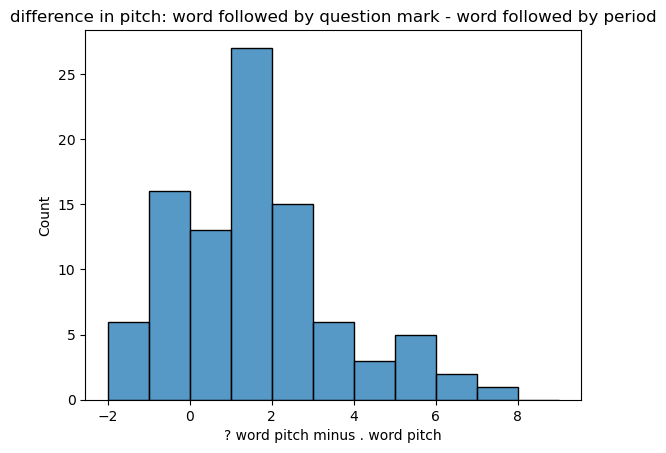

In [335]:
sns.histplot(questionDf["?-."], bins=np.arange(-2, 10, 1))
plt.title("difference in pitch: word followed by question mark - word followed by period")
plt.xlabel("? word pitch minus . word pitch")

Text(0.5, 0, "? word pitch minus ' ' word pitch")

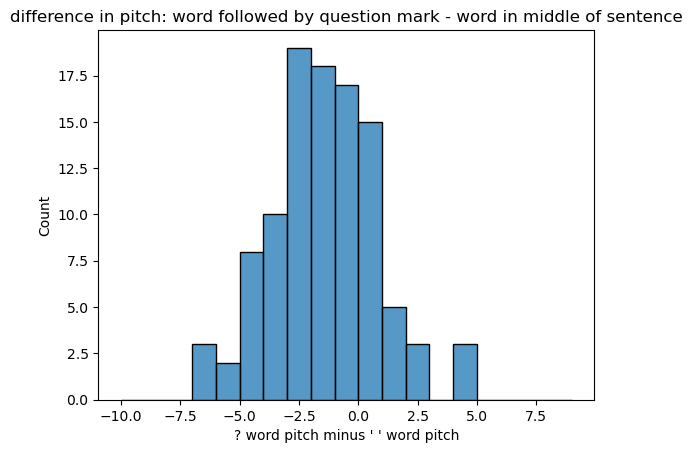

In [342]:
sns.histplot(questionDf["?- "], bins=np.arange(-10, 10, 1))
plt.title("difference in pitch: word followed by question mark - word in middle of sentence")
plt.xlabel("? word pitch minus ' ' word pitch")

In [337]:
questionDf.sort_values(["?-."], ascending=False)

punc,noPunc,,!,.,?,?-,?-.
25,happening,19.407415,NaN,15.739107,23.69031,4.282895,7.951203
21,going,21.543596,NaN,16.982751,23.813013,2.269418,6.830263
89,we,23.846302,NaN,15.015043,21.108562,-2.73774,6.093519
24,happened,18.92025,NaN,17.493772,23.262875,4.342625,5.769103
85,us,20.057107,NaN,18.639043,24.391699,4.334591,5.752655
...,...,...,...,...,...,...,...
75,things,19.694418,NaN,18.096455,14.794203,-4.900216,-3.302253
65,show,19.926968,NaN,18.939064,15.538541,-4.388426,-3.400522
11,called,19.092164,NaN,19.819716,16.301775,-2.790389,-3.517941
22,good,19.812479,NaN,19.085363,14.92445,-4.888029,-4.160913


In [338]:
exDf = groupedDf[groupedDf["exCount"] > 5]

In [339]:
exDf

,noPunc,token,feature,punc,pCount,exCount,qCount,spCount,tokLen
8275,bye,"[ bye, bye., bye, bye., bye, bye.,, bye....","[14.05211075, 37.072656617647056, 23.46515632,...","[ , ., , ., , ., ., , !, ., ., , , , , ...",72,9,0,77,3
9725,chicken,"[ chicken., chicken,, chicken, chicken,, c...","[16.148910522727274, 28.04914419736842, 27.843...","[., , , , , , , , , ., , , , , , ...",23,6,4,124,7
34129,no,"[ no, no, no, no, no, no, no, no, no, ...","[8.477818222222222, 31.121073875, 24.24367, 18...","[ , , , , , , , , , , , , , , , ...",606,9,17,6592,2
35145,oh,"[ oh, oh, oh, oh, oh, oh, oh, oh, oh, ...","[5.988836176470588, 1.0301872083333332, 2.5665...","[ , , , , , , , , , , , , , ., , ...",120,14,3,4562,2


In [340]:
exDf = groupedDf[groupedDf["exCount"] > 5]
exDf = exDf[["noPunc", "punc", "feature"]].explode(["feature", "punc"])
exDf = exDf[["noPunc", "punc", "feature"]].groupby(["noPunc", "punc"]).agg(np.median).reset_index()
exDf = exDf.pivot(columns="punc", values="feature", index="noPunc").reset_index()
exDf["!- "] = exDf["!"] - exDf[" "]
exDf["!-."] = exDf["!"] - exDf["."]